# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [67]:
import numpy as np
import matplotlib.pyplot as plt


In [126]:
import numpy as np

def bisect(f, lower, upper, tol):
    #This means we didn't pick lower and upper values between which the function crosses 0. 
    if f(lower)*f(upper) >= 0: 
        print("Bisection method fails 1.")
        return None
    lower_n = lower
    upper_n = upper

    #Because it'll keep going till we hit the precision with which we want the answer
    while abs(lower_n - upper_n) > tol: 
        print(lower_n, upper_n)
        middle_n = (lower_n + upper_n)/2
        f_m_n = f(middle_n)
        #If this value is neg (means function crosses 0 between the values), that means the lower value stays our lower value and the middle value because the upper.
        if f(lower_n)*f_m_n < 0:
            # lower_n = lower_n
            upper_n = middle_n
        #If this value is neg, then middle value because lower valuer and upper remains upper. 
        elif f(upper_n)*f_m_n < 0:
            lower_n = middle_n
            # upper_n = upper_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return middle_n
        else:
            print("Bisection method fails 2.")
            return None
    return (lower_n + upper_n)/2

f = (lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1)

bisect(f, -1, 1, 0.001)

-1 1
0.0 1
0.0 0.5
0.25 0.5
0.375 0.5
0.375 0.4375
0.40625 0.4375
0.40625 0.421875
0.40625 0.4140625
0.40625 0.41015625
0.408203125 0.41015625


0.40869140625

In [108]:
# confirms the answer: 
import scipy.optimize as opt 

x_min = opt.bisect(f, -1, 1)

print(f"min:{x_min}")

min:0.4082935042806639


# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

In [69]:
f = (lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1)

def recursive_bisect(f, lower, upper, tol):
    x = (upper + lower) / 2

    if f(lower)*f(upper) >= 0: 
        return f"Function does not cross y=0 between x={lower} and x={upper}"

    if np.abs(f(x)) > tol:
        if f(x) > 0 : 
            upper = x 
        else: 
            lower = x
        return recursive_bisect(f, lower, upper, tol)
    return x

recursive_bisect(f, -1, 1, 0.001)

# does not work well with negative values, and in plot below it shows that there are actually 2 locations for x where y=0

0.408203125

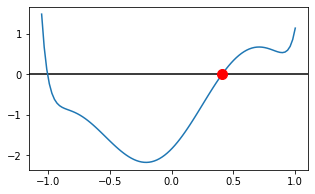

In [111]:
# curious, let's plot it:
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.axhline(0, color='k')
ax.plot(x,f(x))
ax.scatter([x_min], [0], c='r', s=100, zorder=10)
# ax.set_xlim(-5,5)

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [72]:
# Ideas:
# Need budget, genre (categorical), original language (english yes or no), production company (famous yes or no), director (famous yes or no), runtime. 
# Not vote count or vote average cause that happens after the movie is released. 

In [129]:
import pandas as pd

movies_url = {
"movies_metadata": "1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh",
"keywords": "1YLOIxb-EPC_7QpkmRqkq9E6j7iqmoEh3",
"ratings": "1_5HNurSOMnU0JIcXBJ5mv1NaXCx9oCVG",
"credits": "1bX9othXfLu5NZbVZtIPGV5Hbn8b5URPf",
"ratings_small": "1fCWT69efrj4Oxdm8ZNoTeSahCOy6_u6w",
"links_small": "1fh6pS7XuNgnZk2J3EmYk_9jO_Au_6C15",
"links": "1hWUSMo_GwkfmhehKqs8Rs6mWIauklkbP",
}
def read_gdrive(url):
    """
    Reads file from Google Drive sharing link
    """
    path = 'https://drive.google.com/uc?export=download&id='+url
    return pd.read_csv(path)

In [130]:
movies_metadata = read_gdrive('1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh')

In [173]:
movies = movies_metadata.copy()

In [174]:
# Dropping columns I know I won't use: 
movies  = movies.drop(['adult', 'homepage', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 'spoken_languages', 'status', 'tagline', 'video', 'vote_average', 'vote_count'], axis = 1)

In [175]:
# Data cleaning: Let's see where the na's are
# movies = movies_metadata.copy()
total = movies.isnull().sum().sort_values(ascending=False)
percent_1 = movies.isnull().sum()/movies.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
belongs_to_collection,40972,90.1
runtime,263,0.6
release_date,87,0.2
original_language,11,0.0
title,6,0.0
revenue,6,0.0
production_countries,3,0.0
production_companies,3,0.0
id,0,0.0
genres,0,0.0


In [176]:
# Cleaning data. Dropping movies where budget, revenue or runtime, are 0
movies = movies[movies.budget != 0]
movies = movies[movies.revenue != 0]
movies = movies[movies.runtime != 0]

# Removing entries that aren't numeric in budget
movies = movies[~movies.budget.str.contains("jpg")]

# Turning budget into a float
movies.budget = movies.budget.astype('float')

# Removing Nan's
movies = movies.dropna(subset=['budget', 'revenue', 'runtime'])


In [177]:
# Making PROFIT column (will be target)
movies['profit'] = movies.revenue - movies.budget

# Making a OHE of whether part of a collection or not:
movies['belongs_to_collection'] = movies['belongs_to_collection'].notna().astype(int)

# Making a OHE of whether original language is English or not
movies['lang_en'] = (movies.original_language=='en').astype(int)

In [178]:
# Get primary genre of movie
def get_genre(row):
    row = eval(row)
    for d in row:
        return d['name']
    return " "

movies['genre1'] = movies.genres.apply(get_genre)


#OHE of genre1
name = 'genre' + "_"
movies = movies.join(pd.get_dummies(movies['genre1'], drop_first = True, prefix = name))
# X = X.drop(columns = ['genre1']) #if problems, comment this out
# movies.columns

In [179]:
# Engineering production company: 
def get_prod_comp(row):
    row = eval(row)
    for d in row:
        return d['name']
    return " "

movies['prod_comp'] = movies.production_companies.apply(get_prod_comp)

# https://www.the-numbers.com/movies/production-companies/#production_companies_overview=l10:od3

prod_list = ['Warner Bros.',
'Sony Pictures Motion Picture Group',
'Walt Disney Studios',
'Universal Pictures',
'20th Century Fox',
'Paramount Pictures',
'Lionsgate Films',
'The Weinstein Company',
'Metro-Goldwyn-Mayer Studios',
'DreamWorks Pictures',
'Columbia Pictures',
'Marvel Studios'
            ]

movies['prod_comp_yn'] = movies['prod_comp'].apply(lambda x: 1 if (x in prod_list) else 0)

In [180]:
# Joining credits dataframe to this one, to get the director of the movie
credits_df = pd.read_csv('/Users/mayarossi/ds-workshop/3-5-optimization/data/credits.csv')

movies["id"] =pd.to_numeric(movies['id'], errors='coerce',downcast="integer")
movies.dtypes
movies = movies.merge(credits_df,on=["id"],how="left")
# movies.head()

In [181]:
# filling in missing crew info with "Director ... unknown" (to preserve rows instead of just dropping them)
movies.crew = movies.crew.fillna("{'credit_id': '52fe4284c3a36847f8024f4f','department': 'Writing','gender': 2,'id': 12891, 'job':'Director','name': 'unknown','profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}")
movies.crew = movies.crew.astype('str')


In [182]:
# Get director 
def get_director(row):
    row = eval(row)
    for d in row:
        # print(type(d))
        if type(d) is dict:
            if d['job'].lower() == 'director':
                return d['name']
    return " "

movies['director'] = movies.crew.apply(get_director)


#list of top 10 famous directors (highest grossing films)
# https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-specific-technical-role/director

f_dir = ['Steven Spielberg', 'Anthony Russo', 'Joe Russo', 'Peter Jackson', 'Michael Bay', 'James Cameron', 'David Yates', 'Christopher Nolan', 'J.J. Abrams', 'Tim Burton']

movies['fam_dir2'] = movies['director'].apply(lambda x: 1 if (x in f_dir) else 0)

In [183]:
# make sure no missing values
movies.describe()

,belongs_to_collection,budget,id,revenue,runtime,profit,lang_en,genre__Action,genre__Adventure,genre__Animation,...,genre__Music,genre__Mystery,genre__Romance,genre__Science Fiction,genre__TV Movie,genre__Thriller,genre__War,genre__Western,prod_comp_yn,fam_dir2
count,7401.000000,7.401000e+03,7401.000000,7.401000e+03,7401.000000,7.401000e+03,7401.000000,7401.000000,7401.000000,7401.000000,...,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000,7401.000000
mean,0.200649,2.263261e+07,66554.896230,6.887489e+07,108.005405,4.624228e+07,0.859343,0.161194,0.065667,0.025402,...,0.006621,0.012296,0.023510,0.015674,0.000135,0.034995,0.006756,0.005810,0.168221,0.014052
std,0.400513,3.693766e+07,98591.813959,1.464675e+08,20.711525,1.215058e+08,0.347691,0.367735,0.247715,0.157353,...,0.081104,0.110209,0.151528,0.124217,0.011624,0.183780,0.081921,0.076007,0.374087,0.117714
min,0.000000,0.000000e+00,5.000000,1.000000e+00,11.000000,-1.657101e+08,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,9594.000000,2.402459e+06,94.000000,1.933700e+04,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.000000e+06,19053.000000,1.692912e+07,104.000000,6.500000e+06,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.900000e+07,70981.000000,6.734701e+07,118.000000,4.141057e+07,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.800000e+08,443319.000000,2.787965e+09,338.000000,2.550965e+09,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
X = movies.drop(columns = ['genres', 'id', 'original_language', 
                           'production_companies', 'production_countries', 
                           'release_date', 'revenue', 'title', 'genre1', 
                           'cast', 'crew', 'director', 'profit', 'prod_comp'])

X.columns

Index(['belongs_to_collection', 'budget', 'runtime', 'lang_en',
       'genre__Action', 'genre__Adventure', 'genre__Animation',
       'genre__Comedy', 'genre__Crime', 'genre__Documentary', 'genre__Drama',
       'genre__Family', 'genre__Fantasy', 'genre__Foreign', 'genre__History',
       'genre__Horror', 'genre__Music', 'genre__Mystery', 'genre__Romance',
       'genre__Science Fiction', 'genre__TV Movie', 'genre__Thriller',
       'genre__War', 'genre__Western', 'prod_comp_yn', 'fam_dir2'],
      dtype='object')

In [185]:
X.columns

Index(['belongs_to_collection', 'budget', 'runtime', 'lang_en',
       'genre__Action', 'genre__Adventure', 'genre__Animation',
       'genre__Comedy', 'genre__Crime', 'genre__Documentary', 'genre__Drama',
       'genre__Family', 'genre__Fantasy', 'genre__Foreign', 'genre__History',
       'genre__Horror', 'genre__Music', 'genre__Mystery', 'genre__Romance',
       'genre__Science Fiction', 'genre__TV Movie', 'genre__Thriller',
       'genre__War', 'genre__Western', 'prod_comp_yn', 'fam_dir2'],
      dtype='object')

In [186]:
# Model time 

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For X, see cell above
X['constant'] = 1

y = movies['profit']

est = sm.OLS(y, X).fit(cov_type = 'HC2')

est.summary()


/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 26, but rank is 25
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     60.71
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          2.41e-276
Time:                        18:36:37   Log-Likelihood:            -1.4615e+05
No. Observations:                7401   AIC:                         2.924e+05
Df Residuals:                    7374   BIC:                         2.925e+05
Df Model:                          26                                         
Covariance Type:                  HC2                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
belongs_to_collection   6.771e+07   3.66e+06     18.492      0.000    6.05e+07    7.49e+07
budget                     1.5763      0.088     17.992      0.000       1.405       1.748
runtime                 5.001e+05   6.49e+04      7.701      0.000    3.73e+05    6.27e+05
lang_en                 6.684e+06   2.19e+06      3.056      0.002     2.4e+06     1.1e+07
genre__Action          -2.024e+07    7.4e+06     -2.735      0.006   -3.48e+07   -5.74e+06
genre__Adventure       -8.573e+06   1.01e+07     -0.853      0.394   -2.83e+07    1.11e+07
genre__Animation        3.785e+07   1.44e+07      2.624      0.009    9.58e+06    6.61e+07
genre__Comedy           -1.07e+06   7.06e+06     -0.152      0.879   -1.49e+07    1.28e+07
genre__Crime           -1.835e+07   7.51e+06     -2.442      0.015   -3.31e+07   -3.62e+06
genre__Documentary      8.909e+05   7.14e+06      0.125      0.901   -1.31e+07    1.49e+07
genre__Drama           -9.357e+06   6.99e+06     -1.338      0.181   -2.31e+07    4.35e+06
genre__Family           3.793e+07   2.36e+07      1.606      0.108   -8.37e+06    8.42e+07
genre__Fantasy         -1.382e+07   1.05e+07     -1.312      0.190   -3.45e+07    6.83e+06
genre__Foreign         -5.911e+06   1.07e+07     -0.550      0.582    -2.7e+07    1.51e+07
genre__History         -1.436e+07   1.13e+07     -1.268      0.205   -3.66e+07    7.84e+06
genre__Horror          -1.889e+07   7.57e+06     -2.495      0.013   -3.37e+07   -4.05e+06
genre__Music           -1.688e+07   9.47e+06     -1.782      0.075   -3.54e+07    1.68e+06
genre__Mystery         -7.764e+06   1.11e+07     -0.698      0.485   -2.96e+07     1.4e+07
genre__Romance           8.68e+06   9.22e+06      0.941      0.347    -9.4e+06    2.68e+07
genre__Science Fiction  -5.95e+06   1.57e+07     -0.379      0.705   -3.68e+07    2.48e+07
genre__TV Movie         3.517e+07    6.9e+06      5.099      0.000    2.17e+07    4.87e+07
genre__Thriller        -1.593e+07   8.15e+06     -1.955      0.051   -3.19e+07    4.33e+04
genre__War             -3.643e+07   1.43e+07     -2.547      0.011   -6.45e+07   -8.39e+06
genre__Western         -2.066e+07   1.34e+07     -1.538      0.124    -4.7e+07    5.67e+06
prod_comp_yn            2.696e+06   3.71e+06      0.727      0.467   -4.58e+06    9.97e+06
fam_dir2                 1.72e+08   3.15e+07      5.468      0.000     1.1e+08    2.34e+08
constant               -5.725e+07   1.02e+07     -5.615      0.000   -7.72e+07   -3.73e+07
==============================================================================
Omnibus:                     6842.731   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           806504.516
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      53.501

In [187]:
# Recycling my recursion function from previous workshop
def myrecur(mymodel, my_X, mypval=0.05):
    """
    Removes all the p's > mypval and reruns 
    to see if there are any more
    to remove, until there aren't.
    """
    p_vals= pd.DataFrame(mymodel.pvalues)
    p_vals.columns = ['pvalue']
    coefs = pd.DataFrame(mymodel.params)
    coefs.columns = ['coefs_col']

    #BASE CASE should be when there are no more pvalues > mypval, and 
    # then we return the list of features with all pvalues under mypval. 

    if len(list(p_vals[p_vals['pvalue'] > mypval].index)) <= 0:  
        print(f'features kept: {list(my_X)}, R2 = {mymodel.rsquared}, AIC = {mymodel.aic}')
        return mymodel.summary() 
        
    else:
        to_remove = list(p_vals[p_vals['pvalue'] > mypval].index)
        new_X = my_X.drop(columns=to_remove)
        mymodel = sm.OLS(y, new_X).fit(cov_type='HC2')
    return myrecur(mymodel, new_X)

In [188]:
myrecur(est, X)

features kept: ['belongs_to_collection', 'budget', 'runtime', 'lang_en', 'genre__Action', 'genre__Animation', 'genre__Crime', 'genre__Horror', 'genre__TV Movie', 'genre__War', 'fam_dir2', 'constant'], R2 = 0.4332750037518649, AIC = 292369.46717283764
/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     125.6
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          4.83e-243
Time:                        18:36:44   Log-Likelihood:            -1.4617e+05
No. Observations:                7401   AIC:                         2.924e+05
Df Residuals:                    7389   BIC:                         2.925e+05
Df Model:                          11                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
belongs_to_collection  6.829e+07   3.66e+06     18.680      0.000    6.11e+07    7.55e+07
budget                    1.5835      0.082     19.294      0.000       1.423       1.744
runtime                4.444e+05   6.29e+04      7.062      0.000    3.21e+05    5.68e+05
lang_en                7.082e+06   2.14e+06      3.310      0.001    2.89e+06    1.13e+07
genre__Action         -1.453e+07   3.38e+06     -4.299      0.000   -2.12e+07   -7.91e+06
genre__Animation       4.204e+07   1.27e+07      3.301      0.001    1.71e+07     6.7e+07
genre__Crime           -1.24e+07    3.1e+06     -4.000      0.000   -1.85e+07   -6.32e+06
genre__Horror         -1.398e+07    3.3e+06     -4.235      0.000   -2.04e+07   -7.51e+06
genre__TV Movie        3.946e+07   1.81e+06     21.828      0.000    3.59e+07     4.3e+07
genre__War            -2.969e+07   1.25e+07     -2.369      0.018   -5.43e+07   -5.13e+06
fam_dir2                1.72e+08   3.14e+07      5.484      0.000    1.11e+08    2.33e+08
constant              -5.701e+07   7.54e+06     -7.566      0.000   -7.18e+07   -4.22e+07
==============================================================================
Omnibus:                     6872.942   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812333.251
Skew:                           4.061   Prob(JB):                         0.00
Kurtosis:                      53.678   Cond. No.                     3.73e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 3.73e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
#

In [147]:
# Feature_selection below for comparison: 

In [189]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

X = X
# X['constant'] = 1
y = y

num_feats=12
X_norm = MinMaxScaler().fit_transform(X)
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')
print(list(rfe_feature))

RFE_X = X[list(rfe_feature)]

feat_sel_est = sm.OLS(y, sm.add_constant(RFE_X)).fit(cov_type='HC2')
feat_sel_est.summary()


Fitting estimator with 27 features.
Fitting estimator with 17 features.
['belongs_to_collection', 'budget', 'runtime', 'genre__Action', 'genre__Animation', 'genre__Crime', 'genre__Family', 'genre__Horror', 'genre__TV Movie', 'genre__War', 'genre__Western', 'fam_dir2']
/Users/mayarossi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     141.2
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          6.80e-296
Time:                        18:36:56   Log-Likelihood:            -1.4617e+05
No. Observations:                7401   AIC:                         2.924e+05
Df Residuals:                    7388   BIC:                         2.924e+05
Df Model:                          12                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.106e+07   6.69e+06     -7.637      0.000   -6.42e+07    -3.8e+07
belongs_to_collection  6.728e+07   3.62e+06     18.575      0.000    6.02e+07    7.44e+07
budget                    1.5920      0.079     20.090      0.000       1.437       1.747
runtime                4.403e+05   6.02e+04      7.310      0.000    3.22e+05    5.58e+05
genre__Action         -1.398e+07   3.33e+06     -4.194      0.000   -2.05e+07   -7.45e+06
genre__Animation       4.205e+07   1.26e+07      3.329      0.001    1.73e+07    6.68e+07
genre__Crime           -1.17e+07   3.09e+06     -3.787      0.000   -1.78e+07   -5.64e+06
genre__Family          4.339e+07   2.28e+07      1.903      0.057   -1.31e+06    8.81e+07
genre__Horror         -1.252e+07   3.26e+06     -3.846      0.000   -1.89e+07   -6.14e+06
genre__TV Movie        4.091e+07   1.65e+06     24.840      0.000    3.77e+07    4.41e+07
genre__War            -3.016e+07   1.25e+07     -2.422      0.015   -5.46e+07   -5.76e+06
genre__Western        -1.336e+07   1.16e+07     -1.150      0.250   -3.61e+07    9.41e+06
fam_dir2               1.722e+08   3.12e+07      5.514      0.000    1.11e+08    2.33e+08
==============================================================================
Omnibus:                     6835.525   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           801028.509
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      53.327   Cond. No.                     3.73e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 3.73e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [149]:
# Both options below work: 

In [190]:
X = sm.add_constant(RFE_X)

Xt = np.transpose(X)
XtX = np.dot(Xt,X)
Xty = np.dot(Xt,y)
beta = np.linalg.solve(XtX,Xty)

print(beta)


[-5.10605991e+07  6.72764814e+07  1.59200586e+00  4.40337025e+05
 -1.39798682e+07  4.20541281e+07 -1.16976925e+07  4.33928637e+07
 -1.25198470e+07  4.09105746e+07 -3.01593203e+07 -1.33551956e+07
  1.72203917e+08]


In [191]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([-5.10605991e+07,  6.72764814e+07,  1.59200586e+00,  4.40337025e+05,
       -1.39798682e+07,  4.20541281e+07, -1.16976925e+07,  4.33928637e+07,
       -1.25198470e+07,  4.09105746e+07, -3.01593203e+07, -1.33551956e+07,
        1.72203917e+08])

In [192]:
feat_sel_est.params
# same coeffs 

const                   -5.106060e+07
belongs_to_collection    6.727648e+07
budget                   1.592006e+00
runtime                  4.403370e+05
genre__Action           -1.397987e+07
genre__Animation         4.205413e+07
genre__Crime            -1.169769e+07
genre__Family            4.339286e+07
genre__Horror           -1.251985e+07
genre__TV Movie          4.091057e+07
genre__War              -3.015932e+07
genre__Western          -1.335520e+07
fam_dir2                 1.722039e+08
dtype: float64

# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [193]:
# sum of squares: 
def gradient_SSE(b_hat,y,X):
    res = np.sum(((X.dot(b_hat)) - y)**2)
    return res

In [197]:
from scipy.optimize import minimize

# We have X from before (RFE_X)
y = movies.profit

#create beta hat vector to maximize on
#will store the values of maximum likelihood beta parameters
#Arbitrarily initialized to all zeros
b_hat = np.zeros(np.shape(RFE_X)[1])

# β that minimizes the squared loss function (gradient_SSE) of linear regression:
gradient_est = minimize(gradient_SSE, b_hat, args=(y,RFE_X), method='powell')

#print vector of betahats (maximized)
gradient_est['x']

## values are a litte different from above. 

array([ 6.45200609e+07,  1.62730150e+00, -1.02464239e+04, -1.58711043e+07,
        3.03355859e+07, -1.28810769e+07,  3.41893821e+07, -1.89235296e+07,
        2.97753410e+07, -2.56476054e+07, -1.21199995e+07,  1.79413807e+08])